This analysis examines the rock artists selected by students in a History of Rock Music course to write for an end of term rock artist biography assignment at a community college located in the Pacific Northwest. 500 students wrote biographies between 2018 - 2023, 273 were female, 198 male, and 29 students of unknown gender. The most popular artists selected were identified, with Elvis Presley being at the top of the list, approximately one out of every ten female students (36 students choose to write about Elvis, 29 female, 7 male). Elvis was chosen more than twice as often as the second place artist, Freddie Mercury, at 17. Students were over three times as likely to write about an individual than a band (392 to 108), even if the individual came to fame in a band (in other words, students overwhelmingly chose Jim Morrison instead of The Doors, Kurt Cobain instead of Nirvana, etc.). Similarly, students were over three times as likely to write about a North American artist than a British artist (373 to 114). This held true across both genders. 

In the analysis of rock genres, hard rock emerged as the predominant subgenre among students. A notable observation is the consistency in genre preferences between male and female students, with nine out of the top 10 genres being the same for both groups. For genre classification, I utilized the Spotify API, which provided a comprehensive genre dataset. However, it's worth noting that we excluded certain genres from our analysis. Genres like mellow gold, album rock, classic rock, rock, and pop were omitted. These were either too obscure or too general to yield meaningful insights for this study's objectives.




In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Replace the following path with the path to your CSV file
file_path = '/Users/lancevallis/Desktop/Rock Artist Biography Project/Master Rock Artist Spreadsheet Dec. 29.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Replace NaN values with blank spaces
df.fillna('', inplace=True)

df

,Artist,Gender Of Student,Band/Individual,North American/British/Other,Year,album rock,art rock,alternative rock,arena rock,blues,...,motown,quiet storm,britpop,industrial metal,industrial rock,slayer,post-punk,synth punk,synthpop,neo soul
0,James Brown,F,Individual,North American,2018,,,,,1.0,...,,,,,,,,,,
1,David Bowie,M,Individual,British,2018,,1.0,1.0,,,...,,,,,,,,,,
2,AC/DC,F,Band,Other,2018,,,,1.0,,...,,,,,,,,,,
3,Creedence Clearwater Revival,?,Band,North American,2018,,,,,,...,,,,,,,,,,
4,The Beach Boys,F,Band,North American,2018,,,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Robert Fripp,M,Individual,British,2023,,1.0,,,,...,,,,,,,,,,
496,Adam Gontier,F,Individual,North American,2023,,,,,,...,,,,,,,,,,
497,The Strokes,M,Band,North American,2023,,,1.0,,,...,,,,,,,,,,
498,Carlos Santana,F,Individual,North American,2023,,,,,,...,,,,,,,,,,


In [2]:
# Convert data types to integer for further processing
# List of columns to exclude from conversion to integer
exclude_columns = ['Artist', 'Gender Of Student', 'Band/Individual', 'North American/British/Other']

# Iterate over columns and convert to integer where applicable
for col in df.columns:
    if col not in exclude_columns:
        # Convert column to numeric, then to integer if possible
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

# Replace zeros with blank spaces in the converted columns
for col in df.columns:
    if col not in exclude_columns:
        df[col] = df[col].replace(0, '')
        
# Display the DataFrame to confirm the change (optional)
df

,Artist,Gender Of Student,Band/Individual,North American/British/Other,Year,album rock,art rock,alternative rock,arena rock,blues,...,motown,quiet storm,britpop,industrial metal,industrial rock,slayer,post-punk,synth punk,synthpop,neo soul
0,James Brown,F,Individual,North American,2018,,,,,1,...,,,,,,,,,,
1,David Bowie,M,Individual,British,2018,,1,1,,,...,,,,,,,,,,
2,AC/DC,F,Band,Other,2018,,,,1,,...,,,,,,,,,,
3,Creedence Clearwater Revival,?,Band,North American,2018,,,,,,...,,,,,,,,,,
4,The Beach Boys,F,Band,North American,2018,,,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Robert Fripp,M,Individual,British,2023,,1,,,,...,,,,,,,,,,
496,Adam Gontier,F,Individual,North American,2023,,,,,,...,,,,,,,,,,
497,The Strokes,M,Band,North American,2023,,,1,,,...,,,,,,,,,,
498,Carlos Santana,F,Individual,North American,2023,,,,,,...,,,,,,,,,,


In [3]:
# Display the DataFrame to confirm the change 
df.head()

,Artist,Gender Of Student,Band/Individual,North American/British/Other,Year,album rock,art rock,alternative rock,arena rock,blues,...,motown,quiet storm,britpop,industrial metal,industrial rock,slayer,post-punk,synth punk,synthpop,neo soul
0,James Brown,F,Individual,North American,2018,,,,,1,...,,,,,,,,,,
1,David Bowie,M,Individual,British,2018,,1,1,,,...,,,,,,,,,,
2,AC/DC,F,Band,Other,2018,,,,1,,...,,,,,,,,,,
3,Creedence Clearwater Revival,?,Band,North American,2018,,,,,,...,,,,,,,,,,
4,The Beach Boys,F,Band,North American,2018,,,,,,...,,,,,,,,,,


In [4]:
# List of columns to exclude from conversion
exclude_columns = ['Artist', 'Gender Of Student', 'Band/Individual', 'North American/British/Other', 'Year']

# Iterate over columns and convert to integer where applicable
for col in df.columns:
    if col not in exclude_columns:
        # Convert column to numeric, then to integer
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

# Replace 0 values with a blank space in the converted columns
for col in df.columns:
    if col not in exclude_columns:
        df[col] = df[col].replace(0, '')

# Display the DataFrame to confirm the change
df


,Artist,Gender Of Student,Band/Individual,North American/British/Other,Year,album rock,art rock,alternative rock,arena rock,blues,...,motown,quiet storm,britpop,industrial metal,industrial rock,slayer,post-punk,synth punk,synthpop,neo soul
0,James Brown,F,Individual,North American,2018,,,,,1,...,,,,,,,,,,
1,David Bowie,M,Individual,British,2018,,1,1,,,...,,,,,,,,,,
2,AC/DC,F,Band,Other,2018,,,,1,,...,,,,,,,,,,
3,Creedence Clearwater Revival,?,Band,North American,2018,,,,,,...,,,,,,,,,,
4,The Beach Boys,F,Band,North American,2018,,,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Robert Fripp,M,Individual,British,2023,,1,,,,...,,,,,,,,,,
496,Adam Gontier,F,Individual,North American,2023,,,,,,...,,,,,,,,,,
497,The Strokes,M,Band,North American,2023,,,1,,,...,,,,,,,,,,
498,Carlos Santana,F,Individual,North American,2023,,,,,,...,,,,,,,,,,


In [5]:
# List of columns to exclude from conversion
exclude_columns = ['Artist', 'Gender Of Student', 'Band/Individual', 'North American/British/Other']

# Iterate over columns and convert to integer where applicable
for col in df.columns:
    if col not in exclude_columns:
        # Convert column to numeric, then to integer if possible
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)
        # Replace 0 with a blank space
        df[col] = df[col].replace(0, '')

# Display the DataFrame to confirm the change
df.head()


,Artist,Gender Of Student,Band/Individual,North American/British/Other,Year,album rock,art rock,alternative rock,arena rock,blues,...,motown,quiet storm,britpop,industrial metal,industrial rock,slayer,post-punk,synth punk,synthpop,neo soul
0,James Brown,F,Individual,North American,2018,,,,,1,...,,,,,,,,,,
1,David Bowie,M,Individual,British,2018,,1,1,,,...,,,,,,,,,,
2,AC/DC,F,Band,Other,2018,,,,1,,...,,,,,,,,,,
3,Creedence Clearwater Revival,?,Band,North American,2018,,,,,,...,,,,,,,,,,
4,The Beach Boys,F,Band,North American,2018,,,,,,...,,,,,,,,,,


In [6]:
total_entries = len(df)
print("Total number of entries:", total_entries)

Total number of entries: 500


In [7]:
# Count the number of entries per year
entries_per_year = df['Year'].value_counts()

# Sort the years for better readability
sorted_entries_per_year = entries_per_year.sort_index()

# Display the result
print("Number of Entries Per Year:")
print(sorted_entries_per_year)

Number of Entries Per Year:
2018    85
2019    86
2020    91
2021    88
2022    76
2023    74
Name: Year, dtype: int64


In [8]:
# Display the data types of all columns without truncation
print(df.dtypes.to_string())

Artist                          object
Gender Of Student               object
Band/Individual                 object
North American/British/Other    object
Year                             int64
album rock                      object
art rock                        object
alternative rock                object
arena rock                      object
blues                           object
blues rock                      object
classic rock                    object
country                         object
folk                            object
glam                            object
gospel                          object
grunge                          object
hard rock                       object
heartland rock                  object
metal                           object
mellow gold                     object
pop                             object
progressive rock                object
psychedelic rock                object
punk                            object
r&b                      

In [9]:
# Count the occurrences of each artist
artist_counts = df['Artist'].value_counts()

# Filter to keep only artists that appear two or more times
frequent_artists = artist_counts[artist_counts >= 2]

# Display the artists and their counts
frequent_artists

Elvis Presley      36
Freddie Mercury    17
Chuck Berry        15
Ozzy Osbourne      14
Jimi Hendrix       14
                   ..
Steve Miller        2
Rob Zombie          2
John Bonham         2
Jack Black          2
Stevie Wonder       2
Name: Artist, Length: 86, dtype: int64

In [10]:
# Count the number of artists that appear 1, 2, 3, 4 times
artists_appearing_once = (artist_counts == 1).sum()
artists_appearing_twice = (artist_counts == 2).sum()
artists_appearing_thrice = (artist_counts == 3).sum()
artists_appearing_four_times = (artist_counts == 4).sum()

# Display the results
print(f"Number of artists that appeared once: {artists_appearing_once}")
print(f"Number of artists that appeared twice: {artists_appearing_twice}")
print(f"Number of artists that appeared three times: {artists_appearing_thrice}")
print(f"Number of artists that appeared four times: {artists_appearing_four_times}")


Number of artists that appeared once: 119
Number of artists that appeared twice: 38
Number of artists that appeared three times: 19
Number of artists that appeared four times: 9


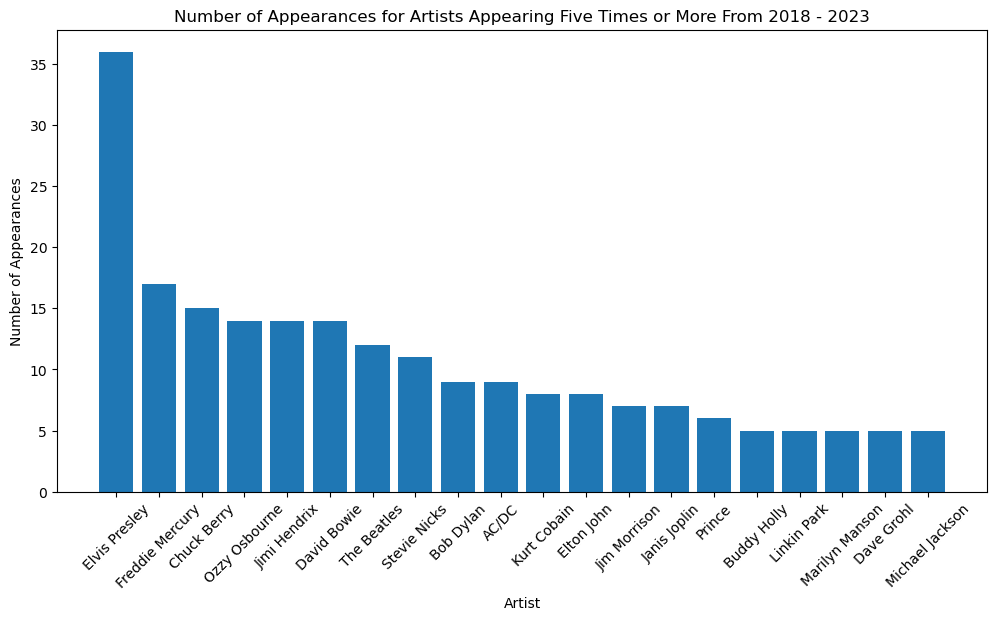

In [11]:
# Filter for artists appearing five or more times
artists_five_or_more = artist_counts[artist_counts >= 5]

# Plotting the bar chart
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
bars = plt.bar(artists_five_or_more.index, artists_five_or_more.values)

plt.xlabel('Artist')
plt.ylabel('Number of Appearances')
plt.title('Number of Appearances for Artists Appearing Five Times or More From 2018 - 2023')
plt.xticks(rotation=45)  # Rotates the artist names for better readability


plt.show()



In [12]:
# Printout of artists appearing five or more times
artist_counts = df['Artist'].value_counts()

# Now apply the filtering and printing as shown above
artists_five_or_more = artist_counts[artist_counts >= 5]
print(artists_five_or_more)


Elvis Presley      36
Freddie Mercury    17
Chuck Berry        15
Ozzy Osbourne      14
Jimi Hendrix       14
David Bowie        14
The Beatles        12
Stevie Nicks       11
Bob Dylan           9
AC/DC               9
Kurt Cobain         8
Elton John          8
Jim Morrison        7
Janis Joplin        7
Prince              6
Buddy Holly         5
Linkin Park         5
Marilyn Manson      5
Dave Grohl          5
Michael Jackson     5
Name: Artist, dtype: int64


In [13]:
# Filter for male and female students
df_male_students = df[df['Gender Of Student'] == 'M']
df_female_students = df[df['Gender Of Student'] == 'F']

# Count the occurrences of each artist for male students
top_artists_male = df_male_students['Artist'].value_counts().head(5)

# Count the occurrences of each artist for female students
top_artists_female = df_female_students['Artist'].value_counts().head(5)

# Display the results
print("Top 5 Artists Chosen by Male Students:")
print(top_artists_male)
print("\nTop 5 Artists Chosen by Female Students:")
print(top_artists_female)


Top 5 Artists Chosen by Male Students:
Elvis Presley    7
Jimi Hendrix     7
Ozzy Osbourne    6
Chuck Berry      6
Kurt Cobain      6
Name: Artist, dtype: int64

Top 5 Artists Chosen by Female Students:
Elvis Presley      29
The Beatles        10
Freddie Mercury    10
Stevie Nicks        9
Ozzy Osbourne       8
Name: Artist, dtype: int64


In [14]:
# Get the total number of male and female students
total_male_students = df_male_students.shape[0]
total_female_students = df_female_students.shape[0]

# Count the occurrences of each artist for male students and convert to percentage
top_artists_male = (df_male_students['Artist'].value_counts() / total_male_students * 100).head(5).round().astype(int)

# Count the occurrences of each artist for female students and convert to percentage
top_artists_female = (df_female_students['Artist'].value_counts() / total_female_students * 100).head(5).round().astype(int)

# Display the results
print("Top 5 Artists Chosen by Male Students (%):")
print(top_artists_male.astype(str) + '%')
print("\nTop 5 Artists Chosen by Female Students (%):")
print(top_artists_female.astype(str) + '%')

Top 5 Artists Chosen by Male Students (%):
Elvis Presley    4%
Jimi Hendrix     4%
Ozzy Osbourne    3%
Chuck Berry      3%
Kurt Cobain      3%
Name: Artist, dtype: object

Top 5 Artists Chosen by Female Students (%):
Elvis Presley      11%
The Beatles         4%
Freddie Mercury     4%
Stevie Nicks        3%
Ozzy Osbourne       3%
Name: Artist, dtype: object


In [15]:
# Check DataFrame column names
print("DataFrame columns:", df.columns)

# Check unique values in the 'Gender Of Student' column
print("Unique values in 'Gender Of Student':", df['Gender Of Student'].unique())

# Check if there are any artists associated with male and female students
print("Number of artists chosen by male students:", df[df['Gender Of Student'] == 'M']['Artist'].nunique())
print("Number of artists chosen by female students:", df[df['Gender Of Student'] == 'F']['Artist'].nunique())


DataFrame columns: Index(['Artist', 'Gender Of Student', 'Band/Individual',
       'North American/British/Other', 'Year', 'album rock', 'art rock',
       'alternative rock', 'arena rock', 'blues',
       ...
       'motown', 'quiet storm', 'britpop', 'industrial metal',
       'industrial rock', 'slayer', 'post-punk', 'synth punk', 'synthpop',
       'neo soul'],
      dtype='object', length=115)
Unique values in 'Gender Of Student': ['F' 'M' '?' '']
Number of artists chosen by male students: 117
Number of artists chosen by female students: 128


In [16]:
# Calculate the total count for each category in 'North American/British/Other'
category_counts = df['North American/British/Other'].value_counts()

# Display the counts
category_counts

North American    373
British           114
Other              13
Name: North American/British/Other, dtype: int64

In [17]:
# Normalize the 'Gender Of Student' column: convert to uppercase and replace '?' with 'Unknown'
df['Gender Of Student'] = df['Gender Of Student'].str.upper().replace('?', 'Unknown')

# Create a pivot table for the breakdown by nationality and gender
breakdown = pd.crosstab(df['North American/British/Other'], df['Gender Of Student'])

# Display the pivot table
breakdown


Gender Of Student,,F,M,Unknown
North American/British/Other,,,,
British,0,64,44,6
North American,2,203,148,20
Other,0,6,6,1


In [18]:
# Count the occurrences of 'Band' and 'Individual' in the 'Band/Individual' column
band_individual_distribution = df['Band/Individual'].value_counts()

band_individual_distribution

Individual    392
Band          108
Name: Band/Individual, dtype: int64

In [37]:
# Assuming df is your DataFrame and it contains 'Gender Of Student' and 'Band/Individual' columns

# Filter the DataFrame for male students
df_male = df[df['Gender Of Student'] == 'M']

# Filter the DataFrame for female students
df_female = df[df['Gender Of Student'] == 'F']

# Count the occurrences of 'Band' and 'Individual' for male students
band_individual_male = df_male['Band/Individual'].value_counts()

# Count the occurrences of 'Band' and 'Individual' for female students
band_individual_female = df_female['Band/Individual'].value_counts()

# Display the results
print("Band/Individual distribution for Male Students:")
display(band_individual_male)
print("\nBand/Individual distribution for Female Students:")
display(band_individual_female)


Band/Individual distribution for Male Students:


Individual    158
Band           40
Name: Band/Individual, dtype: int64


Band/Individual distribution for Female Students:


Individual    211
Band           62
Name: Band/Individual, dtype: int64

In [38]:
# Get the total counts for male and female students
total_male = df_male.shape[0]
total_female = df_female.shape[0]

# Count and calculate percentages for male students
band_individual_male = ((df_male['Band/Individual'].value_counts() / total_male) * 100).round().astype(int).astype(str) + '%'

# Count and calculate percentages for female students
band_individual_female = ((df_female['Band/Individual'].value_counts() / total_female) * 100).round().astype(int).astype(str) + '%'

# Display the results
print("Band/Individual percentage distribution for Male Students:")
print(band_individual_male)
print("\nBand/Individual percentage distribution for Female Students:")
print(band_individual_female)

Band/Individual percentage distribution for Male Students:
Individual    80%
Band          20%
Name: Band/Individual, dtype: object

Band/Individual percentage distribution for Female Students:
Individual    77%
Band          23%
Name: Band/Individual, dtype: object


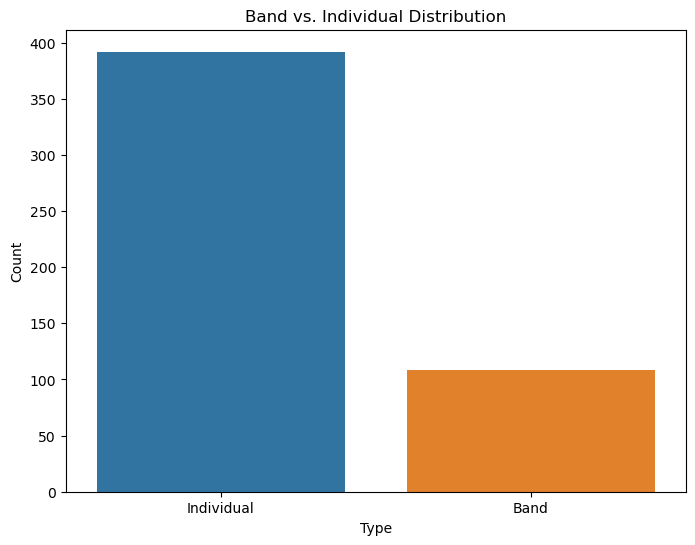

In [19]:
import seaborn as sns

# Plotting Band vs Individual distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=band_individual_distribution.index, y=band_individual_distribution.values)
plt.title("Band vs. Individual Distribution")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

In [20]:
# Normalize the 'Gender' column: trim whitespace and convert to uppercase
df['Gender Of Student'] = df['Gender Of Student'].str.strip().str.upper()

# Replace '?' with 'Unknown' for clarity
df['Gender Of Student'] = df['Gender Of Student'].replace('?', 'Unknown')

# Group by 'North American/British/Other' and 'Gender', then count occurrences
gender_nationality_counts = df.groupby(['North American/British/Other', 'Gender Of Student']).size().unstack(fill_value=0)

# Calculate the percentages for each nationality category within each gender
gender_nationality_percentages = gender_nationality_counts.div(gender_nationality_counts.sum(axis=0), axis=1) * 100

# Round the percentages to the nearest whole number
gender_nationality_percentages = gender_nationality_percentages.round(0).astype(int)

# Display the counts and percentages side by side
print("Gender Nationality Counts:")
display(gender_nationality_counts)

print("Gender Nationality Count Percentages:")
display(gender_nationality_percentages)

Gender Nationality Counts:


Gender Of Student,,F,M,UNKNOWN
North American/British/Other,,,,
British,0,64,44,6
North American,2,203,148,20
Other,0,6,6,1


Gender Nationality Count Percentages:


Gender Of Student,,F,M,UNKNOWN
North American/British/Other,,,,
British,0,23,22,22
North American,100,74,75,74
Other,0,2,3,4


In [21]:
# Convert all entries in 'Gender Of Student' to uppercase 
df['Gender Of Student'] = df['Gender Of Student'].str.upper()

# Replace blank/whitespace-only strings and 'UNKNOWN' with '?'
df['Gender Of Student'] = df['Gender Of Student'].replace(['^\s*$', 'UNKNOWN'], '?', regex=True)

# Count the occurrences of each gender
gender_counts = df['Gender Of Student'].value_counts()

# Display the counts
gender_counts



F    273
M    198
?     29
Name: Gender Of Student, dtype: int64

In [22]:
# Identifying rows where 'Gender Of Student' is an empty string
blank_gender_rows = df[df['Gender Of Student'] == '']

# Display the indices of these rows
print("Indices of rows with blank 'Gender Of Student':")
print(blank_gender_rows.index.tolist())


Indices of rows with blank 'Gender Of Student':
[]


In [23]:
# Remove rows where 'North American/British/Other' is blank, whitespace-only, or 'Unknown'
df = df[~df['North American/British/Other'].isin(['', ' ', 'Unknown'])]


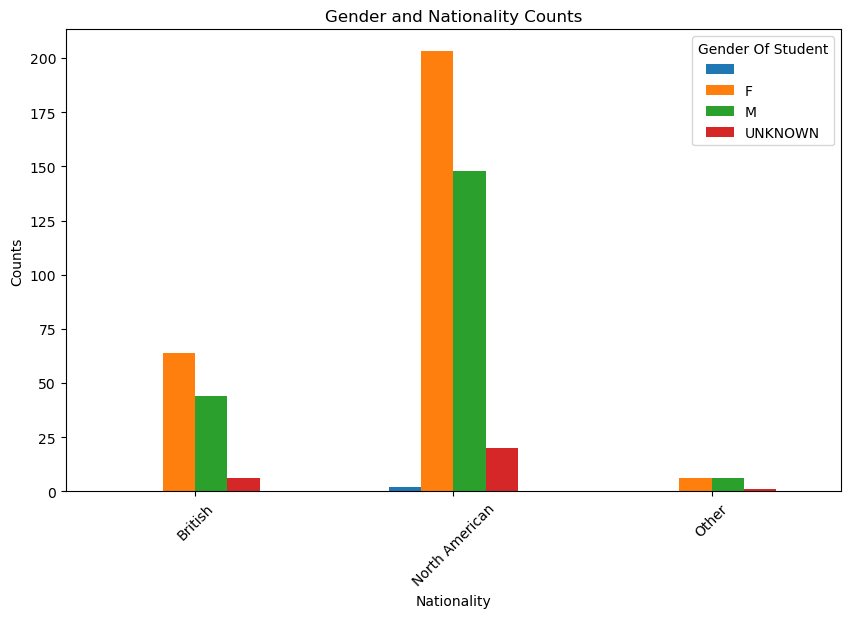

In [35]:
# Plotting the counts
gender_nationality_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Gender and Nationality Counts')
plt.xlabel('Nationality')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()


In [25]:

# If df is a slice of another DataFrame, create a copy:
df = df.copy()

# Ensure 'Year' is of type int
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').fillna(0).astype(int)

# Define a function to categorize years into brackets
def categorize_year(year):
    if 2018 <= year <= 2020:
        return '2018-2020'
    elif 2021 <= year <= 2023:
        return '2021-2023'
    else:
        return 'Other'

# Apply the function to create a new column for the time bracket
df['Time Bracket'] = df['Year'].apply(categorize_year)

# Group by the new 'Time Bracket' column and 'North American/British/Other', then count occurrences
breakdown_counts = df.groupby(['Time Bracket', 'North American/British/Other']).size().unstack(fill_value=0)


breakdown_counts


North American/British/Other,British,North American,Other
Time Bracket,,,
2018-2020,61,193,8
2021-2023,53,180,5


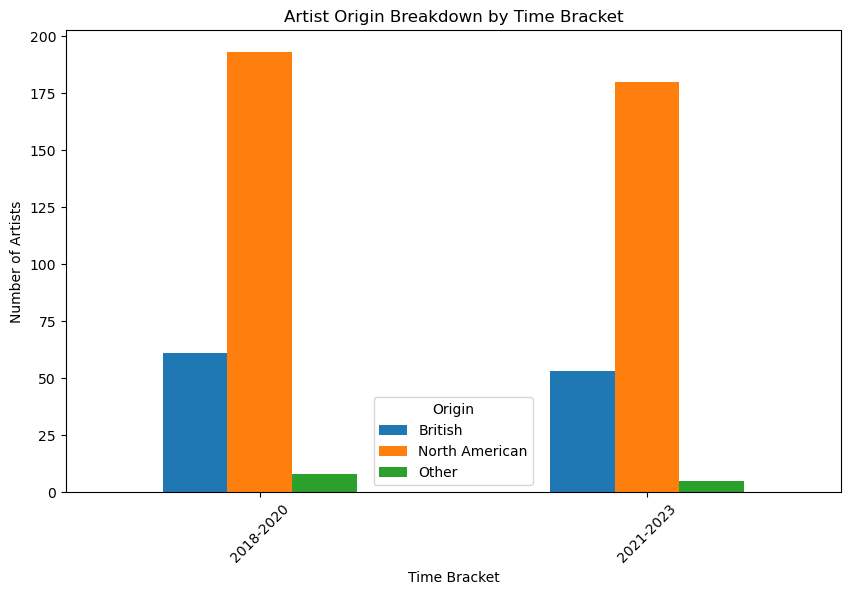

In [26]:

# Plotting a bar chart
breakdown_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Artist Origin Breakdown by Time Bracket')
plt.xlabel('Time Bracket')
plt.ylabel('Number of Artists')
plt.xticks(rotation=45)
plt.legend(title='Origin')
plt.show()


In [27]:
# Calculate the percentages
breakdown_percentages = breakdown_counts.div(breakdown_counts.sum(axis=1), axis=0) * 100

# Round the percentages to the nearest whole number and convert to integer for cleaner display
breakdown_percentages = breakdown_percentages.round(0).astype(int)

# Format the percentages with a % sign
breakdown_percentages_formatted = breakdown_percentages.applymap(lambda x: f"{x}%")

# Display the percentages 
breakdown_percentages_formatted

North American/British/Other,British,North American,Other
Time Bracket,,,
2018-2020,23%,74%,3%
2021-2023,22%,76%,2%


In [28]:
# If df is a slice from another DataFrame, create a copy:
df = df.copy()

# List of genre column names 
genre_columns = [
    'album rock', 'art rock', 'alternative rock', 'arena rock', 'blues', 'blues rock', 
    'classic rock', 'country', 'folk', 'glam', 'gospel', 'grunge', 'hard rock', 
    'heartland rock', 'metal', 'mellow gold', 'pop', 'progressive rock', 
    'psychedelic rock', 'punk', 'r&b', 'rap rock', 'rock-and-roll', 'rockabilly', 
    'symphonic rock', 'piano rock', 'rock', 'singer-songwriter', 'soft rock', 
    'old school thrash', 'thrash metal', 'glam punk', 'funk', 'funk rock', 
    'minneapolis sound', 'synth funk', 'alternative metal', 'groove metal', 
    'melodic metalcore', 'nu metal', 'virginia metal', 'new romantic', 'new wave pop', 
    'proto-metal', 'acid rock', 'experimental', 'instrumental rock', 'jazz fusion', 
    'jazz rock', 'zolo', 'yacht rock', 'post-grunge', 'rap metal', 'sleaze rock', 
    'glam metal', 'permanent wave', 'glam rock', 'emo', 'modern rock', 'pop punk', 
    'pov: indie', 'brill building pop', 'folk rock', 'hel', 'dance pop', 'candy pop', 
    'pixie', 'pop emo', 'art pop', 'art punk', 'solo wave', 'comedy rock', 'comic', 
    'soul', 'country rock', 'roots rock', 'protopunk', 'ambient guitar', 
    'experimental ambient', 'experimental guitar', 'experimental rock', 'garage rock', 
    'alternative hip hop', 'southern rock', 'swamp rock', 'baroque pop', 'sunshine pop', 
    'honky tonk', 'traditional country', 'yodeling', 'alternative country', 'new americana', 
    'electric blues', 'new wave', 'dance rock', 'neo mellow', 'adult standards', 
    'power metal', 'speed metal', 'disco', 'motown', 'quiet storm', 'britpop', 
    'industrial metal', 'industrial rock', 'slayer', 'post-punk', 'synth punk', 
    'synthpop', 'neo soul'
]


# Convert genre columns to numeric type, replacing non-numeric values with 0
for col in genre_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# Sum the occurrences of each genre
genre_counts = df[genre_columns].sum()

# Filter the genre counts to display only those genres that appear five times or more
genres_five_or_more = genre_counts[genre_counts >= 5]

# Sort the filtered genres in descending order and print them
genres_five_or_more_sorted = genres_five_or_more.sort_values(ascending=False)
print(genres_five_or_more_sorted)


rock                   357.0
pop                    159.0
hard rock              129.0
blues                   98.0
blues rock              98.0
classic rock            90.0
alternative rock        66.0
singer-songwriter       65.0
metal                   64.0
psychedelic rock        60.0
soul                    59.0
country                 58.0
gospel                  49.0
soft rock               45.0
rockabilly              44.0
glam rock               42.0
folk                    42.0
folk rock               41.0
funk                    40.0
art rock                35.0
experimental            33.0
experimental rock       33.0
art pop                 28.0
alternative metal       27.0
glam metal              27.0
country rock            27.0
piano rock              25.0
progressive rock        23.0
arena rock              20.0
acid rock               20.0
baroque pop             20.0
southern rock           16.0
punk                    16.0
sunshine pop            15.0
new wave      

Top 10 Genres by Unique Artists (Excluding Specific Genres)


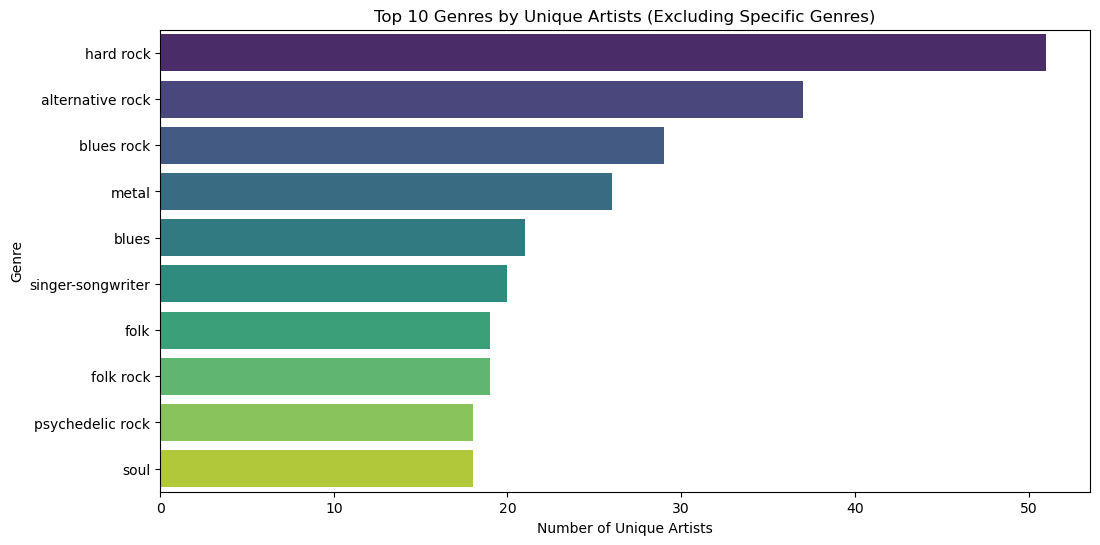

In [29]:
# Genres to exclude
exclude_genres = ['mellow gold', 'album rock', 'classic rock', 'rock', 'pop']

# Filter out the genres to be excluded
filtered_genres = [genre for genre in genre_columns if genre not in exclude_genres]

# Dictionary to hold genre and unique artist count
unique_artist_counts = {}

# Iterate through each genre and count unique artists
for genre in filtered_genres:
    unique_artists = df[df[genre] == 1]['Artist'].nunique()
    unique_artist_counts[genre] = unique_artists

# Sort the dictionary by count in descending order and take top 10
sorted_unique_artist_counts = dict(sorted(unique_artist_counts.items(), key=lambda item: item[1], reverse=True)[:10])

# Print the top 10 genres with unique artist counts, excluding the specified genres
print("Top 10 Genres by Unique Artists (Excluding Specific Genres)")
sorted_unique_artist_counts

# Converting the sorted dictionary to a DataFrame for plotting
unique_artist_df = pd.DataFrame(list(sorted_unique_artist_counts.items()), columns=['Genre', 'Unique Artists'])

# Plotting the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Unique Artists', y='Genre', data=unique_artist_df, palette='viridis')
plt.title('Top 10 Genres by Unique Artists (Excluding Specific Genres)')
plt.xlabel('Number of Unique Artists')
plt.ylabel('Genre')
plt.show()


In [30]:

# Filter for male and female
df_male = df[df['Gender Of Student'] == 'M']
df_female = df[df['Gender Of Student'] == 'F']

# Sum genre counts for male and female, excluding specific genres
genre_counts_male = df_male[filtered_genres].sum().sort_values(ascending=False).head(10)
genre_counts_female = df_female[filtered_genres].sum().sort_values(ascending=False).head(10)

# Print top 10 genres for male and female, excluding specific genres
print("Top 10 Genres for Males (Excluding Specific Genres)")
display(genre_counts_male)

print("Top 10 Genres for Females (Excluding Specific Genres)")
display(genre_counts_female)

Top 10 Genres for Males (Excluding Specific Genres)


hard rock            45.0
blues rock           44.0
blues                36.0
metal                30.0
alternative rock     28.0
psychedelic rock     24.0
singer-songwriter    23.0
soul                 22.0
country              19.0
soft rock            19.0
dtype: float64

Top 10 Genres for Females (Excluding Specific Genres)


hard rock            80.0
blues                59.0
blues rock           50.0
singer-songwriter    39.0
country              38.0
gospel               34.0
metal                33.0
soul                 33.0
psychedelic rock     33.0
alternative rock     32.0
dtype: float64

In [31]:
# Filter for male and female
df_male = df[df['Gender Of Student'] == 'M']
df_female = df[df['Gender Of Student'] == 'F']

# Sum genre counts for male and female, excluding specific genres for top 10
top_genres_male = df_male[filtered_genres].sum().sort_values(ascending=False).head(10)
top_genres_female = df_female[filtered_genres].sum().sort_values(ascending=False).head(10)

# Calculate total genre counts for male and female, excluding specific genres
total_genres_male_excluded = df_male[filtered_genres].sum().sum()
total_genres_female_excluded = df_female[filtered_genres].sum().sum()


# Calculate percentages and convert to strings with a percent sign
percentages_male = ((top_genres_male / total_genres_male_excluded) * 100).astype(int).astype(str) + '%'
percentages_female = ((top_genres_female / total_genres_female_excluded) * 100).astype(int).astype(str) + '%'



# Display results
print("Top 10 Genre Percentages for Males (Excluding Specific Genres)")
display(percentages_male)

print("Top 10 Genre Percentages for Females (Excluding Specific Genres)")
display(percentages_female)


Top 10 Genre Percentages for Males (Excluding Specific Genres)


hard rock            7%
blues rock           7%
blues                6%
metal                5%
alternative rock     4%
psychedelic rock     4%
singer-songwriter    3%
soul                 3%
country              3%
soft rock            3%
dtype: object

Top 10 Genre Percentages for Females (Excluding Specific Genres)


hard rock            8%
blues                6%
blues rock           5%
singer-songwriter    4%
country              4%
gospel               3%
metal                3%
soul                 3%
psychedelic rock     3%
alternative rock     3%
dtype: object

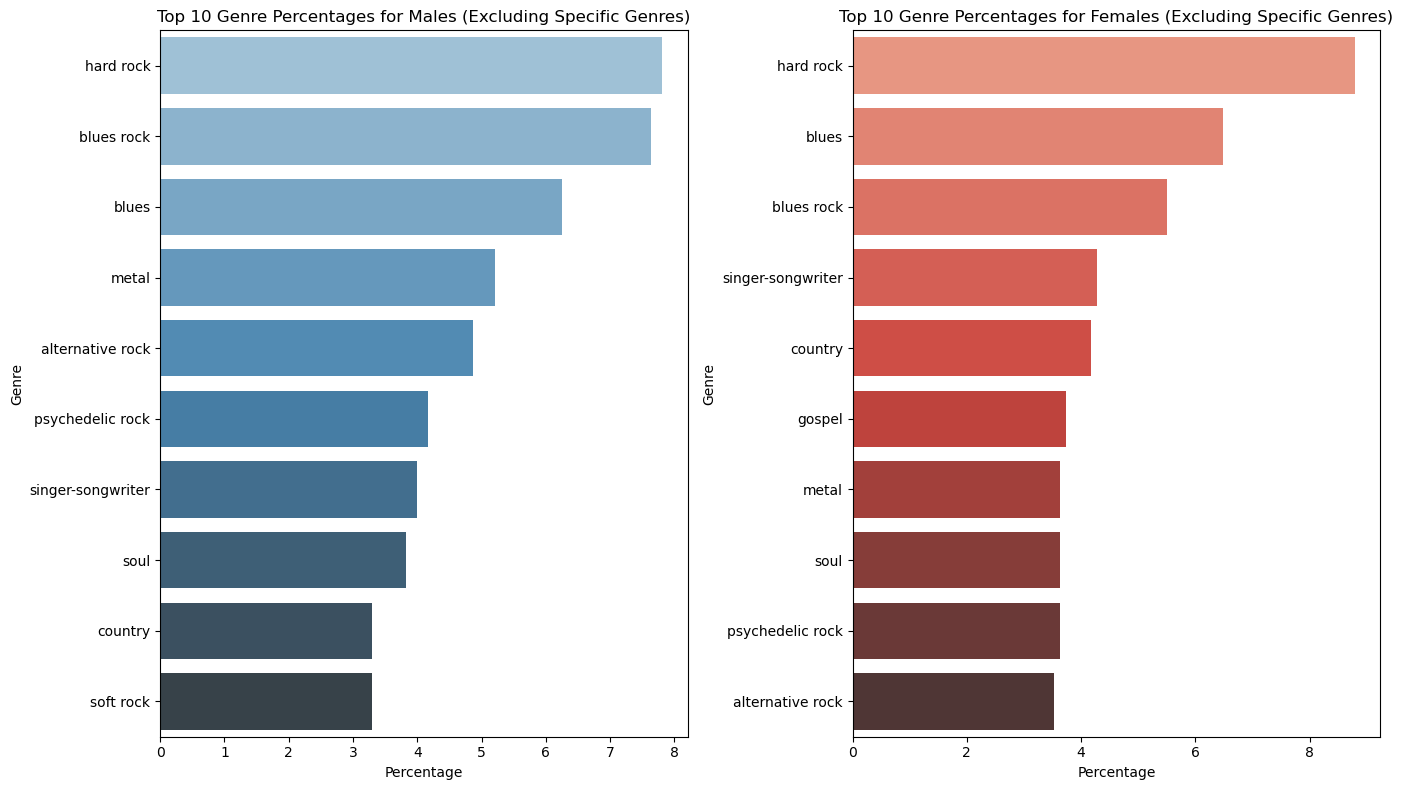

In [32]:

import seaborn as sns

# Assuming the DataFrame 'df', and filtered_genres are already defined
# Also assuming df_male and df_female have been created as per your previous code

# Calculate the total counts for all genres
total_genres_count_male = df_male[filtered_genres].sum().sum()
total_genres_count_female = df_female[filtered_genres].sum().sum()

# Get the top 10 genres and their counts for male and female
top_genres_male = df_male[filtered_genres].sum().sort_values(ascending=False).head(10)
top_genres_female = df_female[filtered_genres].sum().sort_values(ascending=False).head(10)

# Creating DataFrames for plotting
top_genres_male_df = pd.DataFrame({'Genre': top_genres_male.index, 'Percentage': (top_genres_male / total_genres_count_male) * 100})
top_genres_female_df = pd.DataFrame({'Genre': top_genres_female.index, 'Percentage': (top_genres_female / total_genres_count_female) * 100})

# Plotting the bar charts
plt.figure(figsize=(14, 8))

# Male Genre Percentages
plt.subplot(1, 2, 1)
sns.barplot(x='Percentage', y='Genre', data=top_genres_male_df, palette='Blues_d')
plt.title('Top 10 Genre Percentages for Males (Excluding Specific Genres)')
plt.xlabel('Percentage')
plt.ylabel('Genre')

# Female Genre Percentages
plt.subplot(1, 2, 2)
sns.barplot(x='Percentage', y='Genre', data=top_genres_female_df, palette='Reds_d')
plt.title('Top 10 Genre Percentages for Females (Excluding Specific Genres)')
plt.xlabel('Percentage')
plt.ylabel('Genre')

plt.tight_layout()
plt.show()


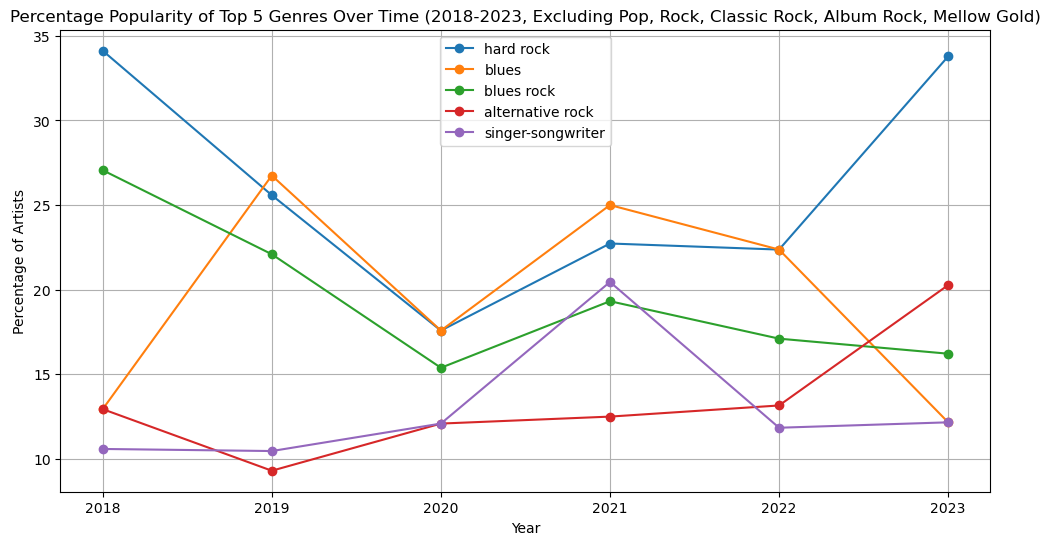

In [33]:
# Getting the top 5 genres excluding the specified ones
top_5_genres = df[filtered_genres].sum().sort_values(ascending=False).head(5).index.tolist()

# Filter the DataFrame for the years 2018 to 2023
df_filtered_years = df[df['Year'].between(2018, 2023)]

# Grouping by year and summing the occurrences of each genre
genre_by_year = df_filtered_years.groupby('Year')[top_5_genres].sum()

# Calculate the total number of artists per year
total_artists_per_year = df_filtered_years.groupby('Year')['Artist'].count()

# Calculate the percentage of each genre per year
genre_percentage_by_year = (genre_by_year.div(total_artists_per_year, axis=0)) * 100

# Plotting the percentage trend over time for the top 5 genres
plt.figure(figsize=(12, 6))
for genre in top_5_genres:
    plt.plot(genre_percentage_by_year.index, genre_percentage_by_year[genre], label=genre, marker='o')
plt.title("Percentage Popularity of Top 5 Genres Over Time (2018-2023, Excluding Pop, Rock, Classic Rock, Album Rock, Mellow Gold)")
plt.xlabel("Year")
plt.ylabel("Percentage of Artists")
plt.legend()
plt.grid(True)
plt.show()